In [1]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8)

In [2]:
# decompress the data
import gzip
filenames = 'train-images-idx3-ubyte t10k-images-idx3-ubyte train-labels-idx1-ubyte t10k-labels-idx1-ubyte'.split()

for i, filename in enumerate(filenames):
    pathin = '../shared-resources/mnist/' + filename + '.gz'
    pathout = pathin[:-3]
    with gzip.open(pathin) as fin:
        print("Reading file #{}: {}".format(i, pathin))
        with open('../shared-resources/mnist/' + filename, 'wb') as fout:
            print("Writing file #{}: {}".format(i, pathout))
            fout.write(fin.read())

Reading file #0: ../shared-resources/mnist/train-images-idx3-ubyte.gz
Writing file #0: ../shared-resources/mnist/train-images-idx3-ubyte
Reading file #1: ../shared-resources/mnist/t10k-images-idx3-ubyte.gz
Writing file #1: ../shared-resources/mnist/t10k-images-idx3-ubyte
Reading file #2: ../shared-resources/mnist/train-labels-idx1-ubyte.gz
Writing file #2: ../shared-resources/mnist/train-labels-idx1-ubyte
Reading file #3: ../shared-resources/mnist/t10k-labels-idx1-ubyte.gz
Writing file #3: ../shared-resources/mnist/t10k-labels-idx1-ubyte


In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
from mnist import MNIST

mnistdb = MNIST('../shared-resources/mnist/')

training_images, training_labels = mnistdb.load_training()
test_images, test_labels = mnistdb.load_testing()

In [5]:
df_train = pd.DataFrame(list(zip(training_images, training_labels)), columns=['image', 'label'])
df_test = pd.DataFrame(list(zip(test_images, test_labels)), columns=['image', 'label'])

In [6]:
df_train.head(5)

,image,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9


In [7]:
print(df_train.label[0])
print(mnistdb.display(img=df_train.image[0]))

5

............................
............................
............................
............................
............................
.....................@@.....
.............@@@@@@.@@......
........@@@@@@@@@@..........
........@@@@@@..@@..........
...........@@@..............
............@...............
............@...............
.............@..............
.............@@.............
..............@@@...........
................@@..........
.................@@.........
.................@@@........
.................@@@........
..............@@@@@.........
............@@@@@@..........
..........@@@@@.............
........@@@@@...............
......@@@@@@................
.....@@@@...................
............................
............................
............................


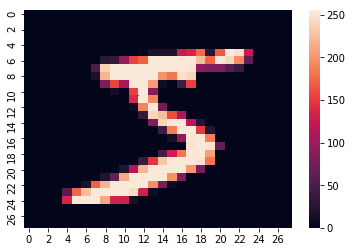

In [8]:
ax = sns.heatmap(pd.np.array(df_train.image[0]).reshape(28, 28))

5


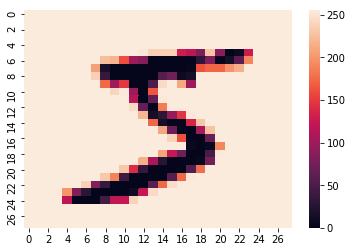

In [9]:
print(df_train.label[0])
ax = sns.heatmap(255 - pd.np.array(df_train.image[0]).reshape(28, 28))


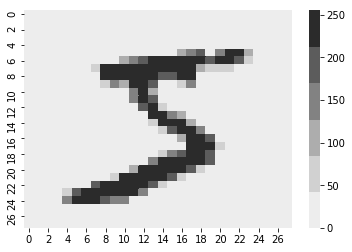

In [10]:
cmap = sns.palettes.color_palette('Greys')
ax = sns.heatmap(pd.np.array(df_train.image[0]).reshape(28, 28), cmap=cmap)

In [11]:
df_train_image = pd.DataFrame(list(df_train.image.values))
df_train_image.head(5)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16).fit(df_train_image)
df_pca10 = pca.transform(df_train_image)

In [13]:
df_pca10 = pd.DataFrame(df_pca10)
df_pca10.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,123.932587,-312.674266,-24.514048,-555.757989,-27.296563,-232.476473,233.996230,159.802872,-363.509711,198.517955,197.412444,-253.875739,-113.489436,750.273387,218.971032,-0.714840
1,1011.718375,-294.857041,596.339572,-460.766207,-827.275147,-181.950706,-45.020167,-104.962008,40.463576,151.031889,-286.577540,-107.201008,-319.930607,92.137555,-238.362059,-159.696302
2,-51.849608,392.173155,-188.509739,521.011387,-306.680746,-1.835312,-859.045102,368.601002,-114.532596,-178.470279,450.457320,-158.886561,185.909961,109.859119,-145.381365,-192.113231
3,-799.127037,-607.197219,273.651233,105.878214,-1.853200,699.654635,-473.713769,-67.322456,302.728401,11.123644,-432.463487,-175.017018,244.150556,165.317127,-151.805360,51.699460
4,-382.754943,730.542865,16.353758,-241.697521,98.161411,43.229634,-91.665094,-405.549547,225.513064,104.187623,-347.840676,459.818679,-257.876122,-312.942169,59.092149,-271.880241


In [14]:
df_pca10.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000e+00,6.089302e-16,-1.965184e-15,1.507681e-15,-9.356942e-15,1.232533e-14,-1.334217e-13,-2.265501e-13,-8.666811e-13,-5.412395e-12,6.023294e-12,-1.055725e-11,4.851633e-11,-3.870371e-11,1.755601e-12,-8.761017e-11
1,6.089302e-16,1.000000e+00,-1.156931e-15,1.104181e-14,-2.971306e-14,4.994187e-14,2.518428e-14,-3.161546e-13,-3.897272e-13,-1.136768e-11,8.152482e-12,-2.415685e-11,6.419825e-11,-5.089021e-11,5.369448e-12,-2.917943e-10
2,-1.965184e-15,-1.156931e-15,1.000000e+00,1.560750e-14,4.421729e-14,-4.446844e-14,1.721253e-12,3.812017e-12,1.061591e-11,4.191499e-11,-6.189996e-11,7.554415e-11,-4.971983e-10,4.086671e-10,-5.809348e-11,3.095995e-10
3,1.507681e-15,1.104181e-14,1.560750e-14,1.000000e+00,-1.882666e-13,3.140944e-13,2.089306e-12,6.760625e-12,8.511943e-12,-4.571029e-11,-1.988461e-12,-1.345758e-10,-1.281473e-10,7.138685e-11,-1.798959e-10,-2.233306e-09
4,-9.356942e-15,-2.971306e-14,4.421729e-14,-1.882666e-13,1.000000e+00,-9.308914e-13,1.441420e-12,8.909822e-12,1.733386e-11,2.414241e-10,-1.962469e-10,5.068289e-10,-1.622633e-09,1.252710e-09,-8.374126e-11,5.549416e-09
5,1.232533e-14,4.994187e-14,-4.446844e-14,3.140944e-13,-9.308914e-13,1.000000e+00,1.536948e-12,-2.434171e-11,-8.900036e-12,-3.428712e-10,2.640468e-10,-6.760607e-10,2.189234e-09,-1.783352e-09,6.989119e-10,-8.730748e-09
6,-1.334217e-13,2.518428e-14,1.721253e-12,2.089306e-12,1.441420e-12,1.536948e-12,1.000000e+00,2.123753e-10,9.161622e-10,2.616318e-09,-4.306758e-09,4.327636e-09,-3.762467e-08,2.855239e-08,-3.513603e-10,4.343271e-09
7,-2.265501e-13,-3.161546e-13,3.812017e-12,6.760625e-12,8.909822e-12,-2.434171e-11,2.123753e-10,1.000000e+00,1.527512e-09,7.044494e-09,-1.079021e-08,6.170487e-09,-1.063462e-07,8.314839e-08,-6.351114e-08,1.615338e-08
8,-8.666811e-13,-3.897272e-13,1.061591e-11,8.511943e-12,1.733386e-11,-8.900036e-12,9.161622e-10,1.527512e-09,1.000000e+00,1.895007e-08,-2.764704e-08,3.207958e-08,-2.347426e-07,1.820772e-07,-1.697031e-08,1.083416e-07
9,-5.412395e-12,-1.136768e-11,4.191499e-11,-4.571029e-11,2.414241e-10,-3.428712e-10,2.616318e-09,7.044494e-09,1.895007e-08,1.000000e+00,-1.409866e-07,2.540015e-07,-1.154712e-06,9.050199e-07,-1.181891e-07,2.184370e-06


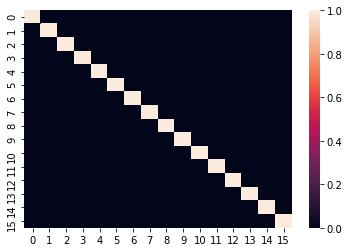

In [15]:
ax = sns.heatmap(df_pca10.corr())

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(df_pca10)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
df_pca10['cluster_id'] = kmeans.predict(df_pca10)
df_pca10['digit_id'] = df_train.label
print(df_pca10.head())

             0           1           2           3           4           5  \
0   123.932587 -312.674266  -24.514048 -555.757989  -27.296563 -232.476473   
1  1011.718375 -294.857041  596.339572 -460.766207 -827.275147 -181.950706   
2   -51.849608  392.173155 -188.509739  521.011387 -306.680746   -1.835312   
3  -799.127037 -607.197219  273.651233  105.878214   -1.853200  699.654635   
4  -382.754943  730.542865   16.353758 -241.697521   98.161411   43.229634   

            6           7           8           9          10          11  \
0  233.996230  159.802872 -363.509711  198.517955  197.412444 -253.875739   
1  -45.020167 -104.962008   40.463576  151.031889 -286.577540 -107.201008   
2 -859.045102  368.601002 -114.532596 -178.470279  450.457320 -158.886561   
3 -473.713769  -67.322456  302.728401   11.123644 -432.463487 -175.017018   
4  -91.665094 -405.549547  225.513064  104.187623 -347.840676  459.818679   

           12          13          14          15  cluster_id  digit

In [18]:
pca2 = PCA(n_components=2).fit(df_train_image)
df_pca2 = pca2.transform(df_train_image)
df_pca2 = pd.DataFrame(df_pca2, columns=list('xy'))
df_pca2['cluster_id'] = kmeans.predict(df_pca10)
df_pca2['digit_id'] = df_train.label
df_pca2.head()

ValueError: Incorrect number of features. Got 18 features, expected 16

In [ ]:
colors = pd.np.array('magenta  red pink orange yellow green blue cyan gray black'.split())[df_pca2.cluster_id] 
df_pca2.plot.scatter(x='x', y='y', c=colors)


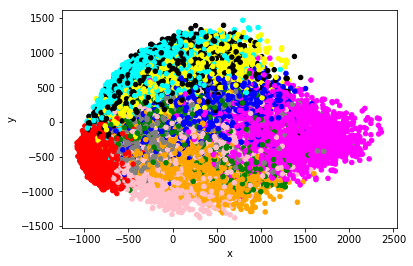

In [58]:
colors = pd.np.array('magenta  red pink orange yellow green blue cyan gray black'.split())[df_pca2.digit_id] 
df_pca2.plot.scatter(x='x', y='y', c=colors)

In [ ]:
digit2cluster = []
for digit in range(10):
    votes = df_pca2.cluster_id[df_pca2.digit_id == digit].value_counts()
    print()
    print(votes)
    print()
    i = 0
    cluster_id = votes.index[i]
    while cluster_id in digit2cluster:
        cluster_id = votes.index[i]
        i += 1
    digit2cluster.append(cluster_id)


In [66]:
sorted(digit2cluster)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]